importing data

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv('nbaDatabase.csv')
dates = pd.to_datetime(df.pop('date'))
df.head()


,homeTeam,homeTeam_id,homeTeam_points_total,homeTeam_points_q1,homeTeam_points_q2,homeTeam_points_q3,homeTeam_points_q4,homeTeam_points_1OT,homeTeam_points_2OT,homeTeam_points_3OT,...,awayTeam_3P,awayTeam_O_Reb,awayTeam_D_Reb,awayTeam_Total_Reb,awayTeam_Ast,awayTeam_Stl,awayTeam_Blk,awayTeam_TO,awayTeam_PF,winner
0,Boston Celtics,BOS,106,28,39,19,20,0,0,0,...,11-37,7,28,35,18,4,4,13,20,Boston Celtics
1,Dallas Mavericks,DAL,122,34,27,31,30,0,0,0,...,14-41,4,27,31,18,2,5,13,19,Dallas Mavericks
2,Dallas Mavericks,DAL,99,31,20,19,29,0,0,0,...,17-46,6,30,36,26,4,6,9,19,Boston Celtics
3,Boston Celtics,BOS,105,25,29,29,22,0,0,0,...,6-26,9,34,43,21,5,3,15,17,Boston Celtics
4,Boston Celtics,BOS,107,37,26,23,21,0,0,0,...,7-27,10,33,43,9,8,1,11,16,Boston Celtics


creating averages and plotting

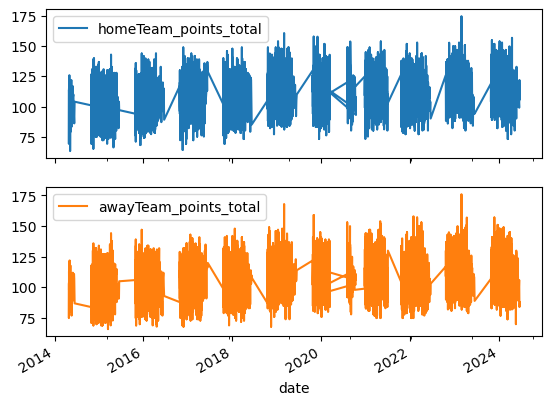

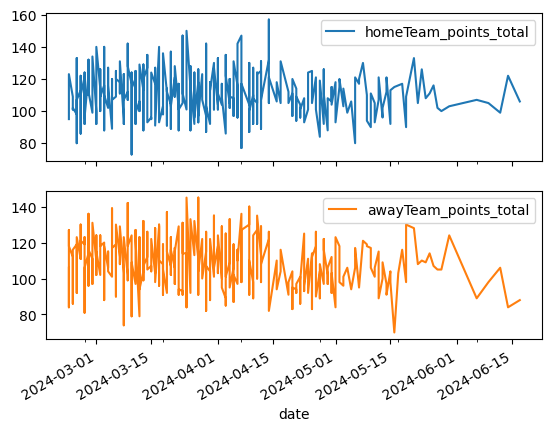

In [ ]:
plot_cols = ['homeTeam_points_total', 'awayTeam_points_total']
plot_features = df[plot_cols]
plot_features.index = dates
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = dates[:480]
_ = plot_features.plot(subplots=True)



grouping by individual teams

In [26]:
uniqueTeams = pd.concat([df['homeTeam_id'],df['awayTeam_id']]).unique()
print(uniqueTeams)

# Create a new column to identify the team in each row
def get_team(row):
    return row['homeTeam_id'] if row['homeTeam_id'] in uniqueTeams else row['awayTeam_id']

df['team'] = df.apply(get_team, axis=1)

grouped_df = df.groupby('team')

for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

# Apply a function to each group to get all rows
def group_to_list(group):
    return group.values.tolist()

result_df = grouped_df.apply(group_to_list)

#print(result_df.to_string())

['BOS' 'DAL' 'MIN' 'IND' 'NYK' 'DEN' 'OKC' 'CLE' 'ORL' 'PHI' 'LAC' 'MIL'
 'NOP' 'MIA' 'PHX' 'LAL' 'CHI' 'SAC' 'GSW' 'SAS' 'MEM' 'POR' 'WAS' 'UTA'
 'DET' 'BKN' 'ATL' 'HOU' 'TOR' 'CHA']
            homeTeam homeTeam_id  homeTeam_points_total  homeTeam_points_q1  \
129    Atlanta Hawks         ATL                    114                  35   
141    Atlanta Hawks         ATL                    111                  27   
185    Atlanta Hawks         ATL                    121                  28   
213    Atlanta Hawks         ATL                    113                  28   
229    Atlanta Hawks         ATL                    123                  28   
...              ...         ...                    ...                 ...   
12704  Atlanta Hawks         ATL                    114                  35   
12718  Atlanta Hawks         ATL                    100                  32   
12744  Atlanta Hawks         ATL                    103                  20   
12796  Atlanta Hawks      

/var/folders/1v/p3vbsf2j0mjgmbb20mtzldkr0000gn/T/ipykernel_54255/3982592576.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = grouped_df.apply(group_to_list)


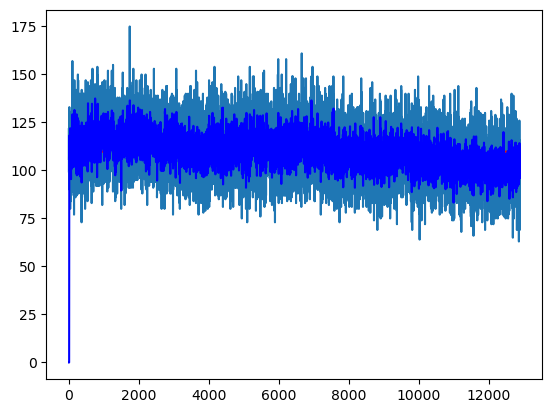

In [9]:
ma_model_5 = [0 for i in range(5,len(homeSeries))]
for i in range(8,len(homeSeries)):
    mean_est = np.mean(homeSeries[0:i])
    residuals = homeSeries[i-4:i]-mean_est
    moving_mean = np.mean(residuals)
    ma_model_5[i-5] = mean_est + moving_mean

plt.plot(homeSeries)
plt.plot([i for i in range(homeNpts)],[homeAvg for i in range(homeNpts)],color='red',linestyle='dotted')
plt.plot(range(5,len(homeSeries)),ma_model_5,color='blue')

Mean Model MSE: 13.052567243500027
MA5 MSE: 13.71093809883062


Text(0, 0.5, 'RE24')

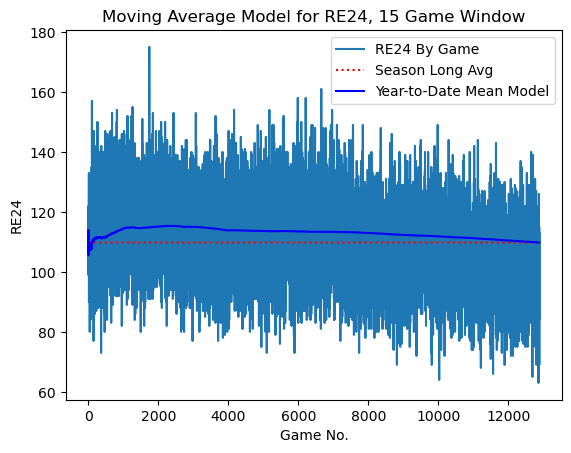

In [10]:
mean_model = [0 for i in range(1,len(homeSeries))]
for i in range(1,len(homeSeries)):
    mean_est = np.mean(homeSeries[0:i])
    mean_model[i-1] = mean_est 

mean_model_mse = np.sqrt(np.mean([(homeSeries[i]-mean_model[i-1])**2 for i in range(1,len(homeSeries))]))
ma5_model_mse = np.sqrt(np.mean([(homeSeries[i]-ma_model_5[i-5])**2 for i in range(5,len(homeSeries))]))
print('Mean Model MSE: '+str(mean_model_mse))
print('MA5 MSE: '+str(ma5_model_mse))


plt.plot(homeSeries)
plt.plot([i for i in range(homeNpts)],[homeAvg for i in range(homeNpts)],color='red',linestyle='dotted')
plt.plot(range(1,len(homeSeries)),mean_model,color='blue')
plt.title('Moving Average Model for RE24, 15 Game Window')
plt.legend(['RE24 By Game','Season Long Avg','Year-to-Date Mean Model'])
plt.xlabel('Game No.')
plt.ylabel('RE24')
